   Age  Bought
0    1       0
1    1       0
2    1       0
3    1       0
4    1       0
Epoch 1/100
38/38 [==============================] - 5s 57ms/step - loss: 0.4093 - accuracy: 0.9866 - val_loss: 0.3994 - val_accuracy: 0.9681
Epoch 2/100
38/38 [==============================] - 0s 13ms/step - loss: 0.3981 - accuracy: 0.9866 - val_loss: 0.3891 - val_accuracy: 0.9681
Epoch 3/100
38/38 [==============================] - 1s 16ms/step - loss: 0.3872 - accuracy: 0.9866 - val_loss: 0.3795 - val_accuracy: 0.9681
Epoch 4/100
38/38 [==============================] - 0s 13ms/step - loss: 0.3770 - accuracy: 0.9866 - val_loss: 0.3701 - val_accuracy: 0.9681
Epoch 5/100
38/38 [==============================] - 0s 12ms/step - loss: 0.3671 - accuracy: 0.9866 - val_loss: 0.3615 - val_accuracy: 0.9681
Epoch 6/100
38/38 [==============================] - 1s 14ms/step - loss: 0.3578 - accuracy: 0.9866 - val_loss: 0.3532 - val_accuracy: 0.9681
Epoch 7/100
38/38 [==============================] - 0s 12

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


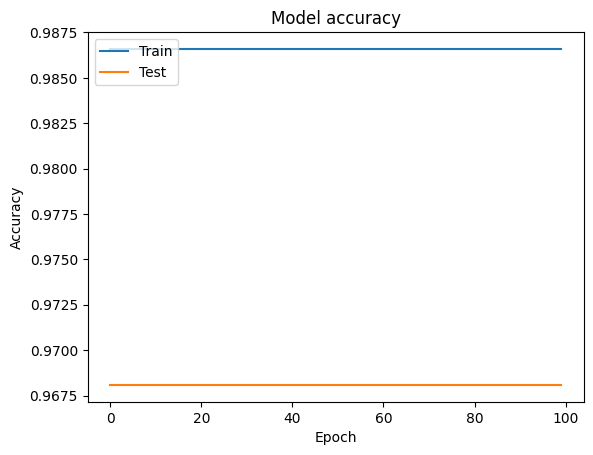

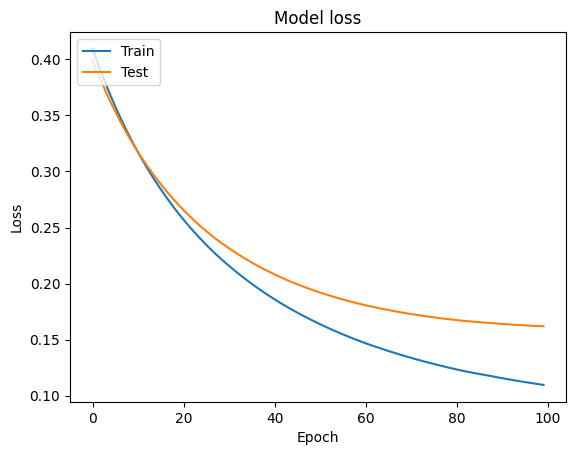

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the data
data = pd.read_csv('/content/sample_data/Product_sales.csv')

# Display the first few rows of the dataframe
print(data.head())

# Separate features and target variable
X = data[['Age']].values
y = data['Bought'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data (optional but recommended for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = Sequential()
model.add(Dense(1, input_dim=1, activation='sigmoid'))  # Logistic regression

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

# Save the model
model.save('logistic_regression_model.h5')

# Plot training & validation accuracy values
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
import tensorflow as tf
import numpy as np

# Load the trained model
model = tf.keras.models.load_model('/content/logistic_regression_model.h5')

# Prepare the input data
ages = np.array([4, 55]).reshape(-1, 1)

# Make predictions
predictions = model.predict(ages)

# Print the predictions
for age, prediction in zip(ages, predictions):
    print(f"Age: {age[0]}, Predicted Bought: {prediction[0]}")

1/1 [==============================] - 0s 215ms/step
Age: 4, Predicted Bought: 0.9999950528144836
Age: 55, Predicted Bought: 1.0


Let's break down the code step by step and explain each part in detail:

### Import necessary libraries
```python
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
```
- **pandas**: Used for data manipulation and analysis.
- **numpy**: Used for numerical operations.
- **tensorflow**: A deep learning framework.
- **Sequential**: A linear stack of layers in Keras.
- **Dense**: A fully connected neural network layer.
- **train_test_split**: A function to split the dataset into training and testing sets.
- **StandardScaler**: A tool to standardize features by removing the mean and scaling to unit variance.

### Load the data
```python
data = pd.read_csv('Product_sales.csv')
```
- **pd.read_csv**: Reads a CSV file into a DataFrame.

### Display the first few rows of the dataframe
```python
print(data.head())
```
- **data.head()**: Displays the first five rows of the DataFrame to get an overview of the data.

### Separate features and target variable
```python
X = data[['Age']].values
y = data['Bought'].values
```
- **X**: The feature matrix containing the 'Age' column.
- **y**: The target vector containing the 'Bought' column.

### Split the data into training and testing sets
```python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```
- **train_test_split**: Splits the data into training and testing sets. `test_size=0.2` means 20% of the data is used for testing, and `random_state=42` ensures reproducibility.

### Normalize the data (optional but recommended for neural networks)
```python
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
```
- **StandardScaler**: Standardizes the features by removing the mean and scaling to unit variance.
- **fit_transform**: Fits the scaler on the training data and transforms it.
- **transform**: Transforms the testing data using the same scaler fitted on the training data.

### Build the neural network model
```python
model = Sequential()
model.add(Dense(1, input_dim=1, activation='sigmoid'))  # Logistic regression
```
- **Sequential**: Initializes a sequential model.
- **Dense**: Adds a dense layer with 1 neuron, input dimension of 1, and 'sigmoid' activation function, which is suitable for binary classification.

### Compile the model
```python
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
```
- **compile**: Configures the model for training.
- **optimizer='adam'**: Uses the Adam optimizer.
- **loss='binary_crossentropy'**: Uses binary cross-entropy loss function, suitable for binary classification.
- **metrics=['accuracy']**: Evaluates the model using accuracy.

### Train the model
```python
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test))
```
- **fit**: Trains the model on the training data.
- **epochs=100**: Trains the model for 100 epochs.
- **batch_size=10**: Uses a batch size of 10.
- **validation_data**: Evaluates the model on the testing data after each epoch.

### Evaluate the model
```python
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')
```
- **evaluate**: Evaluates the model on the testing data.
- **print**: Prints the test accuracy.

### Save the model
```python
model.save('logistic_regression_model.h5')
```
- **save**: Saves the trained model to a file named 'logistic_regression_model.h5'.

### Plot training & validation accuracy values
```python
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
```
- **matplotlib.pyplot**: A plotting library.
- **plt.plot**: Plots the training and validation accuracy over epochs.
- **plt.title, plt.ylabel, plt.xlabel**: Sets the title and labels for the plot.
- **plt.legend**: Adds a legend to the plot.
- **plt.show**: Displays the plot.

### Plot training & validation loss values
```python
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
```
- **plt.plot**: Plots the training and validation loss over epochs.
- **plt.title, plt.ylabel, plt.xlabel**: Sets the title and labels for the plot.
- **plt.legend**: Adds a legend to the plot.
- **plt.show**: Displays the plot.

This code provides a complete workflow for building, training, evaluating, and saving a logistic regression model using TensorFlow and Keras, along with visualizing the training process.